# Taller 2

## Objetivos

Levantamiento de las variables predictoras, y selección de las mejores variables acorde al modelo.

## Alcance

El Taller 2 corresponde al levantamiento de las variables predictoras que permitirán elaborar el mejor modelo para la predicción de la ocurrencia de movimientos en masa. Es decir, que la capacidad de predicción del modelo está sujeta a que las variables incorporadas en el modelo sean realmente aquellas que condicionan la ocurrencia del evento. La ocurrencia de movimientos en masa en cada zona en especifico responde a una serie de variables diferentes, por lo tanto no siempre son las mismas variables.

Por lo tanto se debe partir de levantar de forma adecuada y con toda la precisión que exiga el objeto y escala del estudio todas las variables que inicialmente se considere pueden determinar la ocurrencia de movimientos en masa. Posteriormente, es importante: 

1. Explorar y conocer en detalle la distribución de cada una de las variables, 
2. La correlación para seleccionar variables que no sean redundantes, 
3. Y en algunos casos reducir dimensioanlmente el modelo.

De esta forma entonces, el equipo deberá levantar todas las variables que considere pertinentes para su modelo, entre ellas variables morfométricas, variables categóricas como geología y uso del suelo, y variables tipo buffer. Posteriormente deberá realizar un análisis exploratorio de dichas variables y seleccionar con criterios cuantitativos las variables que mejor desempeño dan al modelo.

## Actividades a realizar

1. Generación de variables morfométricas continuas, tales como pendiente, curvatura plana, vertical, total, rugosidad, aspecto, altura, y demás variables que considere importantes para el modelo.

2. Generación de la variables predictoras categóricas, especificamente geología y coberturas. El mapa de geologia debe ser elaborado a partir de información secundaria apoyado de fotointerpretación de las unidades superficales, tales como depósitos de vertiente, depósitos aluviales, y antrópicos. El mapa de coberturas del suelo se debe elaborar a partir de fotografías aéreas recientes, Google Earth o images de satelite con adecuada resolución acorde con la escala del estudio.

3. Generacion de variables tipo buffer como distancia a drenajes, distancia a fallas y lineamientos, entre otros que considere.

4. Elaborar el análisis exploratorio donde se incluya como mínimo datos estadístico de cada variable de acuerdo con o sin la presencia de movimientos en masa, mapas de dispersión entre variables, distribucion de frecuencias de celdas con y sin movimientos en masa, análisis de outlayers, matrices de correlacion, e implementar métodos de reduccion de dimensiones.

5. Finalmente se deberá seleccionar las variables mejor predictoras para el modelo y justificar.

## Python

In [1]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
#import statsmodels.graphics.api as smg
%matplotlib inline

ModuleNotFoundError: No module named 'rasterio'

In [2]:
!pip install rasterio

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\edier\anaconda3\python.exe' 'C:\Users\edier\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\edier\AppData\Local\Temp\tmpwqk0rb71'
       cwd: C:\Users\edier\AppData\Local\Temp\pip-install-5qja76vs\rasterio
  Complete output (2 lines):
  INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
  ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\edier\anaconda3\python.exe' 'C:\Users\edier\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\edier\AppData\Local\Temp\tmpwqk0rb71' Check the logs for full command output.


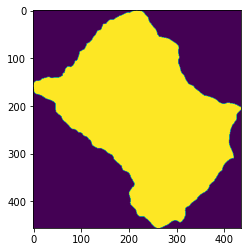

In [2]:
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/slope_rad')
pendiente=raster.read(1)
show(pendiente)

In [3]:
np.unique(pendiente)

array([-3.4028235e+38,  1.5114122e-03,  3.2166885e-03, ...,
        1.0705483e+00,  1.0721574e+00,  1.0760385e+00], dtype=float32)

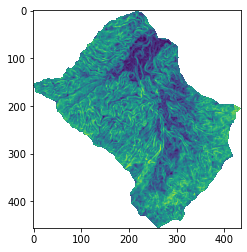

In [4]:
pendiente=np.where(pendiente==-3.4028234663852886e+38,np.nan,pendiente);
show(pendiente);

In [6]:
np.nanmean(pendiente)

0.49100024

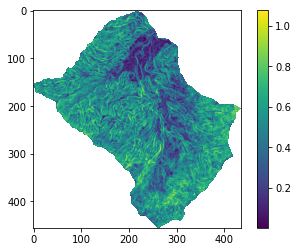

In [7]:
plt.imshow(pendiente)
plt.colorbar()

(456, 435)

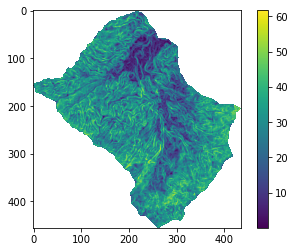

In [8]:
pendiente=pendiente*180/np.pi
plt.imshow(pendiente)
plt.colorbar()
pendiente.shape

In [24]:
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape

(99060,)

(99060,)

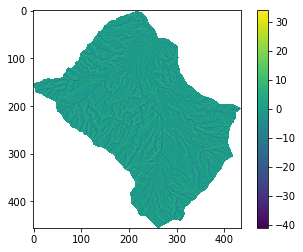

In [9]:
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/curvatura')
curvatura=raster.read(1)
curvatura=np.where(curvatura==-3.4028234663852886e+38,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura_vector_MenM.shape

(99060,)

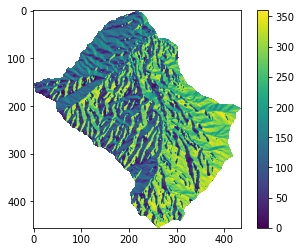

In [10]:
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/aspecto')
aspecto=raster.read(1)
aspecto=np.where(aspecto==-3.4028234663852886e+38,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

(99060,)

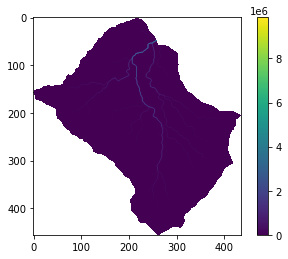

In [11]:
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/flowacum_m2')
flujo=raster.read(1)
flujo=np.where(flujo==-3.4028234663852886e+38,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

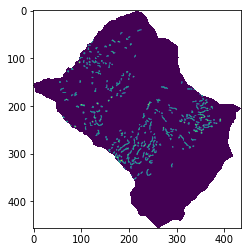

(99060,)

In [12]:
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/inventario.tif')
inventario=raster.read(1)
raster_mask = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/slope_rad')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario=np.where(inventario==1,0,inventario)
inventario=np.where(inventario==2,1,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
show(inventario)
inventario_vector_MenM.shape

(99060,)

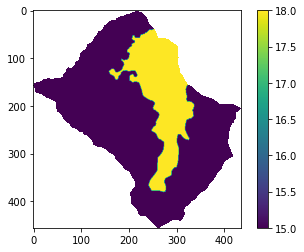

In [15]:
geologia=np.loadtxt(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/gamma.asc', skiprows=6)
np.unique(geologia)
geologia=np.where(geologia==-9999.,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar()
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
geologia_vector_MenM=np.delete(geologia_vector_MenM,-1)
geologia_vector_MenM.shape

(98886,)


(99060,)

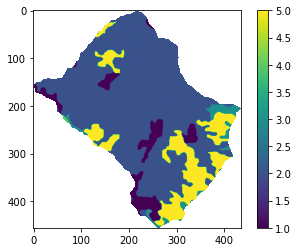

In [21]:
from osgeo import gdal

driver = gdal.GetDriverByName('GTiff')
file = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/Coberturas_Arenosa.tif')
band = file.GetRasterBand(1)
coberturas = band.ReadAsArray()
coberturas=np.where(coberturas==2147483647,np.nan,coberturas)
coberturas_vector=coberturas.ravel()
coberturas_vector_MenM=coberturas_vector[~np.isnan(coberturas_vector)]
plt.imshow(coberturas)
plt.colorbar()
coberturas.shape
coberturas_vector_MenM.shape

cob=np.ndarray.tolist(coberturas_vector_MenM)
for i in range(174):
    a=np.random.randint(2,4)
    cob.append(a)
    
coberturas_vector_MenM=np.asarray(cob)
coberturas_vector_MenM.shape

In [22]:
np.unique(coberturas)

array([ 1.,  2.,  3., ..., nan, nan, nan])

In [28]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM,
   'curvatura':curvatura_vector_MenM, 'geologia':geologia_vector_MenM, 'coberturas':coberturas_vector_MenM}
data = pd.DataFrame(d)
print(list(data.columns))

['inventario', 'pendiente', 'flujo_acum', 'aspecto', 'curvatura', 'geologia', 'coberturas']


In [32]:
data.tail(6)

,inventario,pendiente,flujo_acum,aspecto,curvatura,geologia,coberturas
99054,0.0,23.620783,0.0,300.963745,5.0,15.0,3.0
99055,0.0,28.622263,0.0,290.095245,-0.0,15.0,3.0
99056,0.0,30.439892,0.0,299.291351,11.0,15.0,3.0
99057,0.0,16.970293,0.0,304.992035,5.0,15.0,2.0
99058,0.0,4.044690,0.0,315.000000,3.0,15.0,3.0
99059,0.0,4.289152,0.0,180.000000,-3.0,15.0,3.0


In [34]:
resumen=data.describe().T
print(resumen)

              count          mean            std        min        25%  \
inventario  99060.0      0.026560       0.160793   0.000000   0.000000   
pendiente   99060.0     28.132240      10.509834   0.086598  21.137832   
flujo_acum  99060.0  23187.123047  257582.718750   0.000000   0.000000   
aspecto     99060.0    186.726166     121.806618   0.000000  67.163525   
curvatura   99060.0      0.000000       5.812411 -41.000000  -2.744537   
geologia    99060.0     15.712871       1.276889  15.000000  15.000000   
coberturas  99060.0      2.425813       1.155212   1.000000   2.000000   

                   50%         75%           max  
inventario    0.000000    0.000000  1.000000e+00  
pendiente    29.295362   35.876204  6.165246e+01  
flujo_acum  200.000000  600.000000  9.865900e+06  
aspecto     191.743095  306.869904  3.599956e+02  
curvatura     0.349487    3.226929  3.385083e+01  
geologia     15.000000   15.000000  1.800000e+01  
coberturas    2.000000    2.000000  5.000000e+00  

In [35]:
matriz=data.drop(['inventario'],1)
matriz_array=matriz.values
matriz.head()

,pendiente,flujo_acum,aspecto,curvatura,geologia,coberturas
0,3.194784,0.0,80.800842,0.909546,15.0,2.0
1,4.556033,100.0,80.072861,-1.191040,15.0,2.0
2,15.029085,0.0,114.904884,5.199097,15.0,2.0
3,10.056046,0.0,101.990807,-1.439331,15.0,2.0
4,7.235751,0.0,30.782837,-2.977417,15.0,2.0


In [36]:
matriz_array

array([[  3.19478416,   0.        ,  80.80084229,   0.9095459 ,
         15.        ,   2.        ],
       [  4.55603266, 100.        ,  80.07286072,  -1.19104004,
         15.        ,   2.        ],
       [ 15.02908516,   0.        , 114.90488434,   5.19909668,
         15.        ,   2.        ],
       ...,
       [ 16.97029305,   0.        , 304.99203491,   5.        ,
         15.        ,   2.        ],
       [  4.04469013,   0.        , 315.        ,   3.        ,
         15.        ,   3.        ],
       [  4.28915215,   0.        , 180.        ,  -3.        ,
         15.        ,   3.        ]])

In [37]:
matriz_cont=matriz.drop(['geologia', 'coberturas'],1)
matriz_array_cont=matriz_cont.values
matriz_cont.head()

,pendiente,flujo_acum,aspecto,curvatura
0,3.194784,0.0,80.800842,0.909546
1,4.556033,100.0,80.072861,-1.191040
2,15.029085,0.0,114.904884,5.199097
3,10.056046,0.0,101.990807,-1.439331
4,7.235751,0.0,30.782837,-2.977417


In [39]:
#Para contar el numero de celdas con y sin MenM
data['inventario'].value_counts()

0.0    96429
1.0     2631
Name: inventario, dtype: int64

In [43]:
#Para saber la media de cada variable independiente de acuerdo con la variable dependiente
media=matriz.groupby('geologia').mean()
print(media)

          pendiente    flujo_acum     aspecto  curvatura  coberturas
geologia                                                            
15.0      30.900507   8983.827148  181.633057   0.007699    2.446181
18.0      19.250719  68756.070312  203.066696  -0.024702    2.360466


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA212B0>,
      dtype=object)

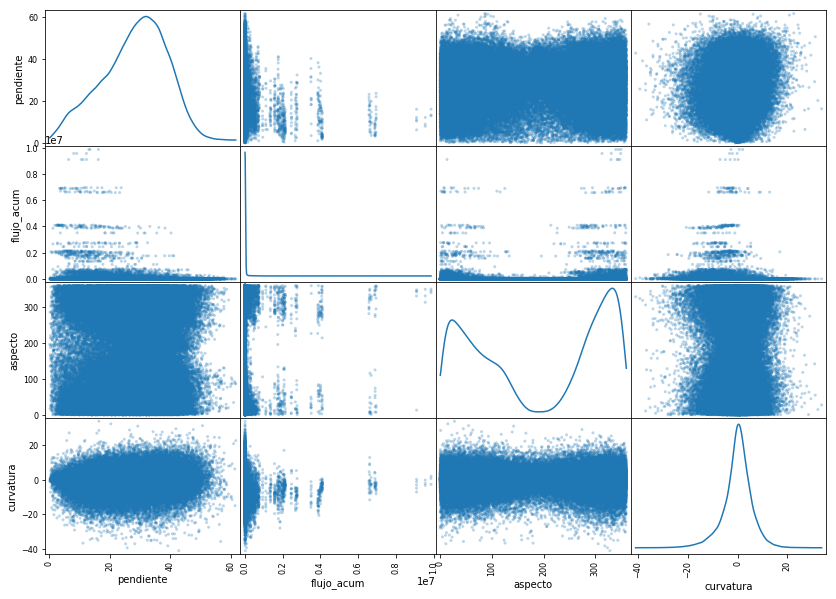

In [16]:
#matriz de scattering con panda
pd.plotting.scatter_matrix(matriz_cont, alpha = 0.3, figsize = (14,10), diagonal='kde');

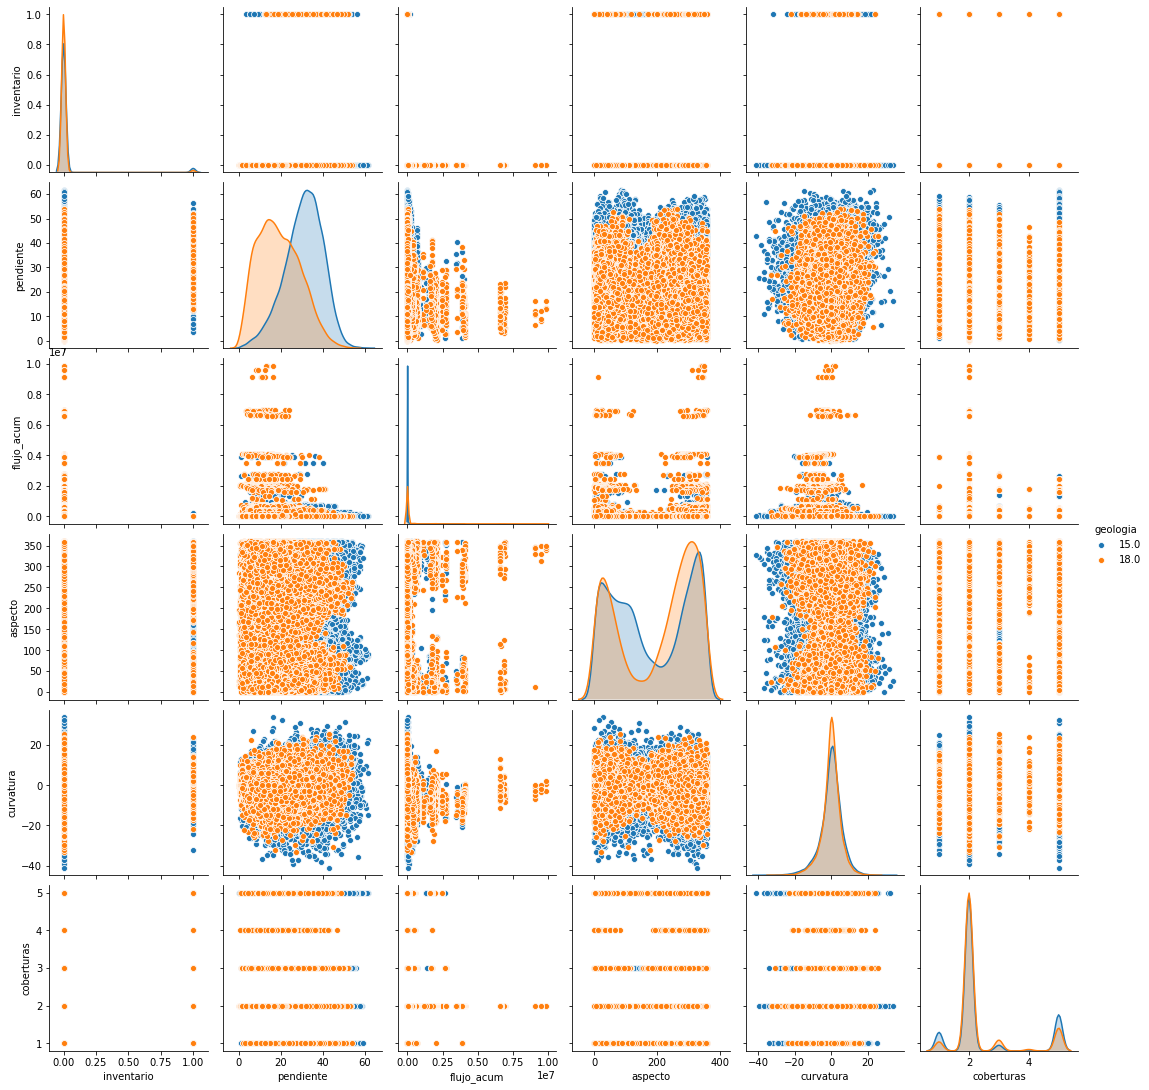

In [44]:
#Matriz de scattering utilizando seaborn
sns.pairplot(data, hue='geologia');

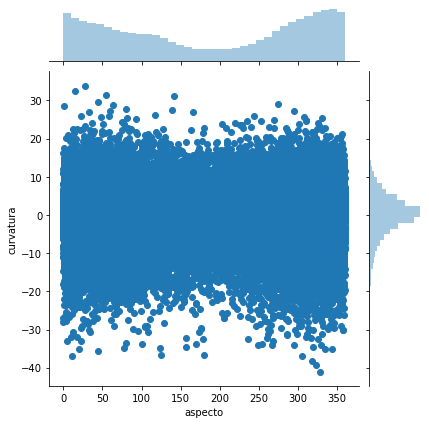

In [45]:
sns.jointplot(x='aspecto', y='curvatura', data=data, kind='scatter');

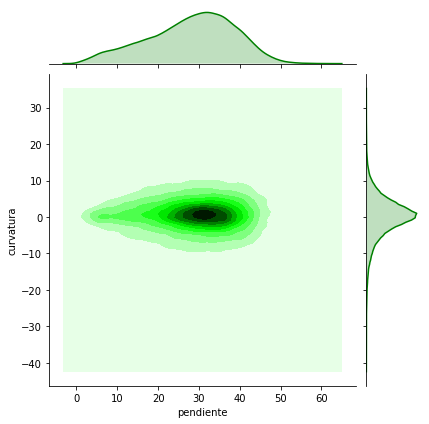

In [46]:
sns.jointplot(x='pendiente', y='curvatura', data=data, kind='kde', color='g');

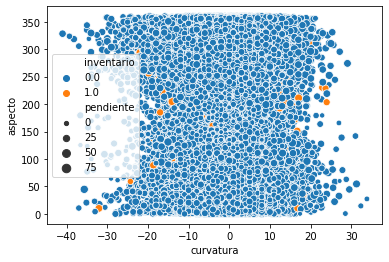

In [47]:
sns.scatterplot(x="curvatura", y="aspecto", hue="inventario", size='pendiente',data=data);

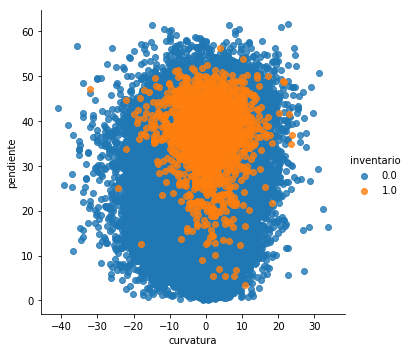

In [49]:
sns.lmplot('curvatura', 'pendiente', data=data, hue='inventario', fit_reg=False);

Text(0, 0.5, 'Frecuencia')

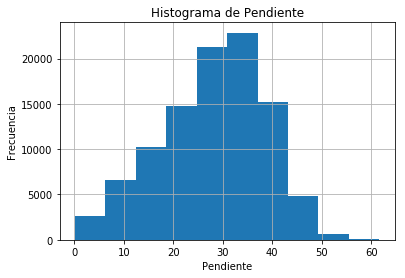

In [18]:
#para histograma de una sola variable
data.pendiente.hist()
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

In [48]:
#Histograma de frecuencia para CON y SIN MenM
data_sin=data[(data['inventario']==0)]
data_con=data[(data['inventario']==1)]

In [49]:
data_sin.head()

,inventario,pendiente,flujo_acum,aspecto,curvatura,geologia,coberturas
0,0.0,3.194784,0.0,80.800842,0.909546,15.0,2.0
1,0.0,4.556033,100.0,80.072861,-1.191040,15.0,2.0
2,0.0,15.029085,0.0,114.904884,5.199097,15.0,2.0
3,0.0,10.056046,0.0,101.990807,-1.439331,15.0,2.0
4,0.0,7.235751,0.0,30.782837,-2.977417,15.0,2.0


In [50]:
data_con.head()

,inventario,pendiente,flujo_acum,aspecto,curvatura,geologia,coberturas
3087,1.0,48.456146,200.0,185.194580,6.083130,15.0,5.0
3088,1.0,49.761219,100.0,189.824493,2.952393,15.0,5.0
3089,1.0,47.416843,0.0,198.636536,1.242676,15.0,5.0
3090,1.0,40.080986,1000.0,212.276825,3.142700,15.0,5.0
3203,1.0,39.940807,300.0,181.749344,-1.636597,15.0,2.0


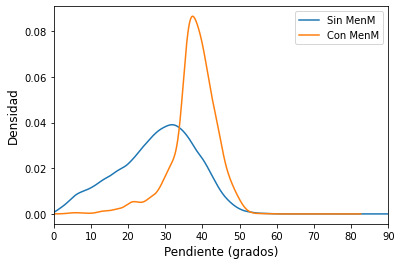

In [52]:
fig, ax = plt.subplots()
data_sin['pendiente'].plot.kde(ax=ax, label='Sin MenM')
data_con['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (grados)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

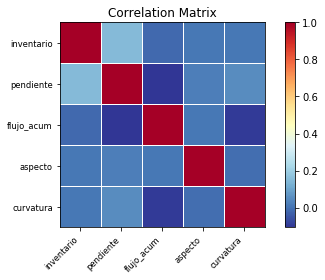

In [39]:
#Matriz de correlacion de Pearson y mapa de calor
MatCorre=DataFrame(data.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

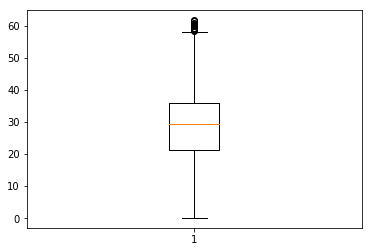

In [37]:
pendiente=data['pendiente']
plt.boxplot(pendiente);

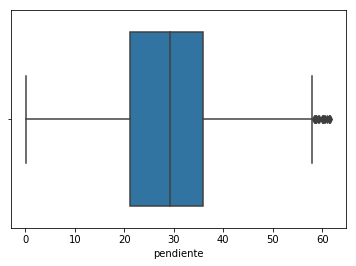

In [38]:
sns.boxplot(x='pendiente', data=data);

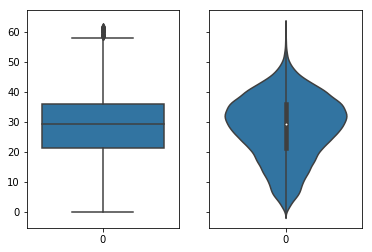

In [42]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data['pendiente'], ax=axes[0]);
sns.violinplot(data=data['pendiente'], ax=axes[1]);

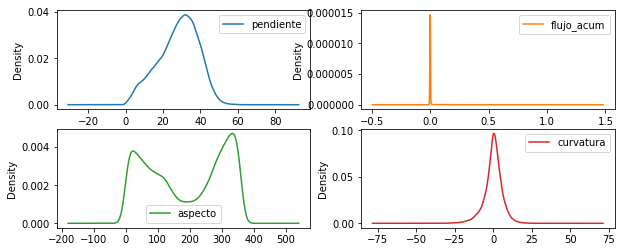

In [32]:
matriz.plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(10, 4));

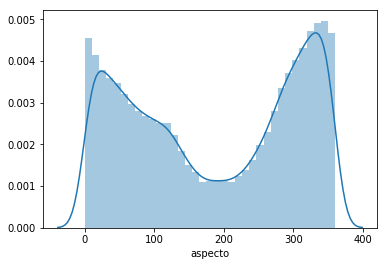

In [36]:
sns.distplot(data['aspecto']);

### Análisis de Componentes Principales (PCA)

El PCA es un método de machine learning no supervisado  para reducir dimensionalmente un modelo con una gran cantidad de variables. Para esta reducción permite identificar las varibales que mas le aportan a la varianza del modelo. En este ejemplo vamso a utilizar un conjunto de variables importados desde una tabla de excel.

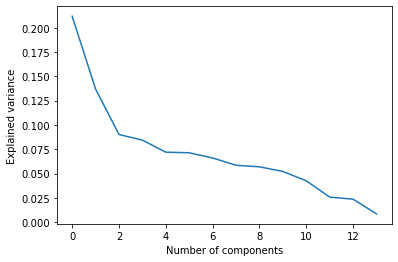

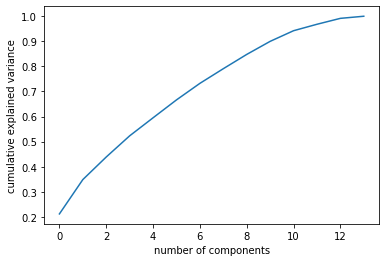

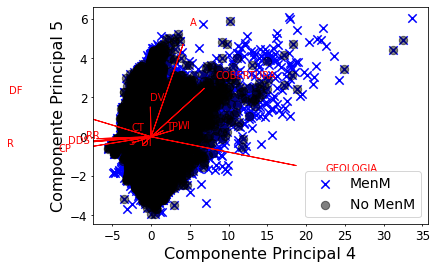

In [56]:
#se importan todas las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#Se defien la ruta de acceso
ruta_in=r"G:\My Drive\INVESTIGACION\PAPERS\PUBLICADOS\Regresion vs WOE_Mariana&Diana\Datos/"
ruta_out=r"G:\My Drive\INVESTIGACION\PAPERS\PUBLICADOS\Regresion vs WOE_Mariana&Diana\Figuras/"

#Se importan los archivos
data= pd.read_excel(ruta_in+'PUNTOS.xlsx', sheet_name='PUNTOS')
puntos=data['INVENTARIO']
data.drop('INVENTARIO', axis=1, inplace=True)

# Se debe escalar los datos antes de aplicar PCA
data = pd.DataFrame(scale(data), columns=['DV', 'A', 'CP', 'CT', 'DF', 'GEOLOGIA','RR','R','S','TPI','WI','COBERTURA','DDS','DI'])

## Se implementa el análisi PCA con la libreria sklearn de python
n = len(data.columns)
pca = PCA(n_components=n)
pca = pca.fit(data)
pca_samples = pca.transform(data)

#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(data)[:,0] 
ys = pca.transform(data)[:,1]

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.show()

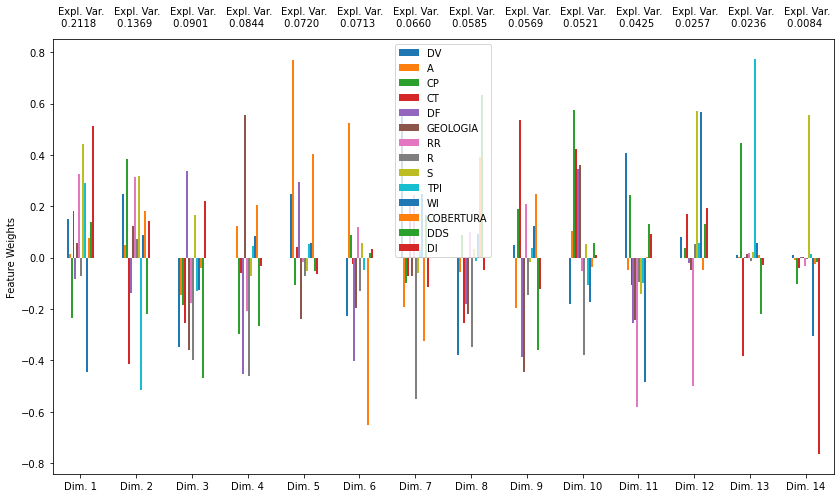

In [58]:
def pca_results(data, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)